In [1]:
import numpy as np
import pandas as pd

NumPy и Pandas уже установлены

#### Выполним генерацию вектора чисел с плавающей точкой

In [2]:
# размерность матрицы и вектора
n = 1000

In [3]:
%%time
vector = np.arange(n*n, dtype=float)

CPU times: user 3.92 ms, sys: 4.53 ms, total: 8.45 ms
Wall time: 6.28 ms


In [5]:
%%time
lis_standart = [i for i in range(n*n)] # стандартными средствами Python

CPU times: user 60.2 ms, sys: 28.2 ms, total: 88.4 ms
Wall time: 93.2 ms


Комментарий: Для одномерного массива из 1 млн элементов разница во времени - почти 15 раз

#### Выполним генерацию матриц чисел с плавающей точкой

In [6]:
%%time
vector_reshaped = vector.reshape(n,n)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 13.8 µs


In [7]:
%%time
identity_matrix = np.identity(n, dtype=float ) # единичная матрица

CPU times: user 901 µs, sys: 1.21 ms, total: 2.12 ms
Wall time: 3.37 ms


Единичная матрица стандартными методами Python:

In [8]:
def identity_matrix_standart(num):
    return [[1 if j==i else 0 for j in range(num)] for i in range(num)] 

In [9]:
%%time
ims = identity_matrix_standart(n)

CPU times: user 107 ms, sys: 13.6 ms, total: 120 ms
Wall time: 122 ms


Комментарий: для единичной матрицы размера 1000х1000 разница во времени - 36 раз

#### Арифметические операции над элементами матрицы

In [85]:
a = np.identity(5, dtype=float)

In [87]:
a + 1

array([[2., 1., 1., 1., 1.],
       [1., 2., 1., 1., 1.],
       [1., 1., 2., 1., 1.],
       [1., 1., 1., 2., 1.],
       [1., 1., 1., 1., 2.]])

In [88]:
a - 3

array([[-2., -3., -3., -3., -3.],
       [-3., -2., -3., -3., -3.],
       [-3., -3., -2., -3., -3.],
       [-3., -3., -3., -2., -3.],
       [-3., -3., -3., -3., -2.]])

In [89]:
a * 3

array([[3., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 3.]])

In [90]:
a / 4

array([[0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25]])

#### Игра "Жизнь"

Место действия игры — размеченная на клетки плоскость, которая может быть безграничной, ограниченной или замкнутой.
Каждая клетка на этой поверхности имеет восемь соседей, окружающих её, и может находиться в двух состояниях: быть «живой» (заполненной) или «мёртвой» (пустой).
Распределение живых клеток в начале игры называется первым поколением. Каждое следующее поколение рассчитывается на основе предыдущего по таким правилам:
в пустой (мёртвой) клетке, с которой соседствуют три живые клетки, зарождается жизнь;
если у живой клетки есть две или три живые соседки, то эта клетка продолжает жить; в противном случае (если живых соседей меньше двух или больше трёх) клетка умирает («от одиночества» или «от перенаселённости»).
https://ru.wikipedia.org/wiki/Игра_«Жизнь»

In [26]:
# создание первого поколения

def create_base_field(n, m):
    
    field = np.zeros((n,m))
    
    # Вероятность появления живой клетки
    threshold = 0.2
    
    # Создаем базовую матрицу первого поколения
    for row in range(1, field.shape[0]-1):
        for col in range(1, field.shape[1]-1):
            probability = np.random.rand()
            
            if probability <= threshold:
                field[row][col] = 1

    return field

In [33]:
field_rows = 15
field_cols = 15

base_field = create_base_field(field_rows, field_cols)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(array):
    
    heatmap = sns.heatmap(array[1:-1,1:-1], cmap = 'Blues', linewidths = 0.25, linecolor = 'black')
    return heatmap

In [35]:
# определение состояния клетки на следующем шаге

def cell_value_new(count_near, cell_value):
    
    # Если клетка жива 
    if cell_value == 1:
        
        # если есть две или три живые соседки
        if count_near in (2,3):
            return 1
        else:
            return 0
    
    # Если клетка мертва
    elif cell_value == 0:
        
        # если соседствуют три живые клетки
        if count_near == 3:
            return 1
        else:
            return 0

In [36]:
# генерация следующего поколения

def generate_new_field(base_field):
    
    # Количество строк
    row_numbers = base_field.shape[0]
    
    # Количество столбцов
    col_numbers = base_field.shape[1]
    
    base_field_new = np.zeros((field_rows, field_cols))
    
    
    # Расчет количества живых соседних клеток
    for row in range(1, row_numbers-1):
        for col in range(1, col_numbers-1):
            n1 = base_field[row-1][col-1]
            n2 = base_field[row-1][col]
            n3 = base_field[row-1][col+1]
            n4 = base_field[row][col+1]
            n5 = base_field[row+1][col+1]
            n6 = base_field[row+1][col]
            n7 = base_field[row+1][col-1]
            n8 = base_field[row][col-1]

            count_near = n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8
            cell_value = cell_value_new(count_near, base_field[row][col])
            
            # Генерация нового поколения
            base_field_new[row][col] = cell_value
            
    return base_field_new

In [37]:
# расчет количества итераций до конца игры

def culc_iter_number(base_field):
    
    # Список всех матриц поколений игры
    base_field_list = []

    iteration = 1
    
    # Прописываем логику конца игры
    while iteration < 100000:
        base_field_prev = base_field.copy()
        base_field_list.append(base_field_prev)
        
        base_field = generate_new_field(base_field)
        
        # Стабильная конфигурация
        if np.array_equal(base_field_prev, base_field):
            return iteration
            break
        
        # на поле не останется ни одной «живой» клетки
        if base_field.sum() == 0:
            return iteration
            break
        
        # периодическая конфигурация
        for field in base_field_list:
            if np.array_equal(field, base_field):
                return iteration
                break
                
        iteration += 1

In [38]:
# Количество итераций до конца игры
iter_number = culc_iter_number(base_field)
iter_number

26

In [46]:
def create_game_of_life(base_field, iter_number):
    
    # Размеры графиков 
    plt.figure(figsize=(18, iter_number*3))
    
    # Выводим тепловую карту для каждого поколения игры
    for iteration in range(iter_number):
        base_field = generate_new_field(base_field)
        
        subplot_rows_numbers = int(iter_number/2)+1
        plt.subplot(subplot_rows_numbers,2,iteration+1)
        plt.subplots_adjust(hspace=0.2)
        plt.title(f'Поколение № {iteration+2}', fontsize=14)
        
        create_heatmap(base_field)

<AxesSubplot:>

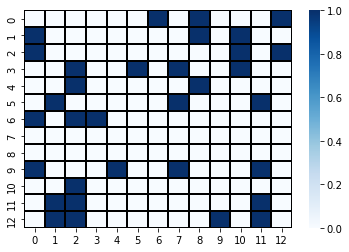

In [42]:
# Первое поколение
create_heatmap(base_field)

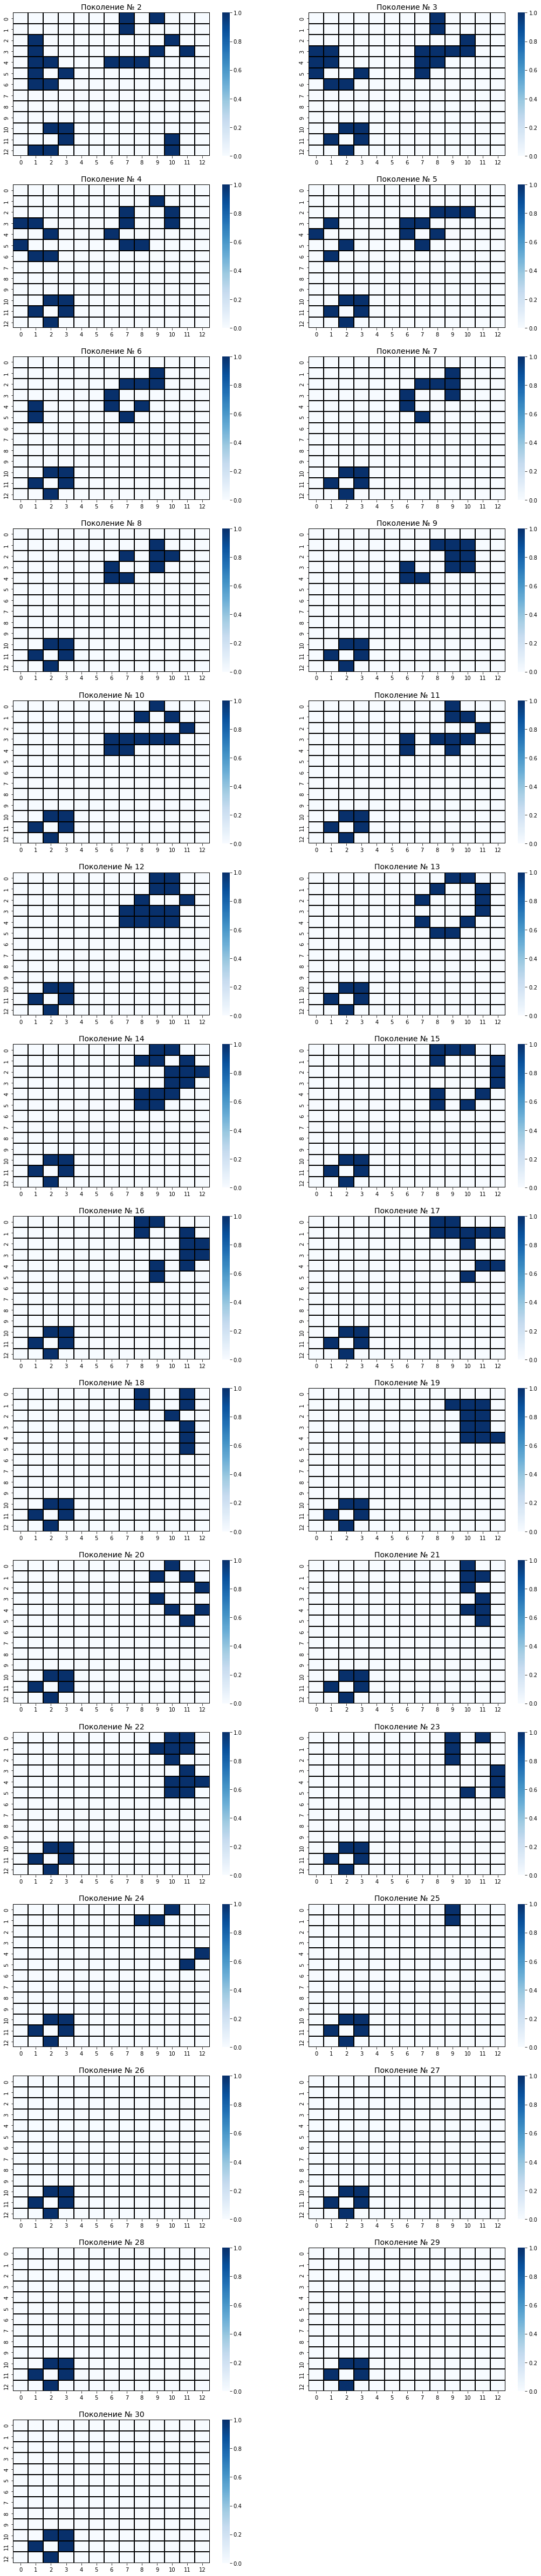

In [47]:
create_game_of_life(base_field, iter_number + 3)